In [1]:
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

from utils.config import Config

from utils.data import RGBDDataset, FrameData
from utils.vis import Visualizer
from utils.depth import correct_depth, clip_depth
from utils.pcd import create_pcd_from_rgbd, clip_radially

data_path = os.path.join(current_dir, Config.DATA_PATH)
dataset = RGBDDataset(data_path)
vis = Visualizer()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
frame_idx = 146
frame: FrameData = dataset[frame_idx] # type: ignore
color = frame['color']
depth = frame['depth_raw']
corrected_depth, _ = correct_depth(depth)
clipped_depth = clip_depth(corrected_depth, 225.0, 325.0)

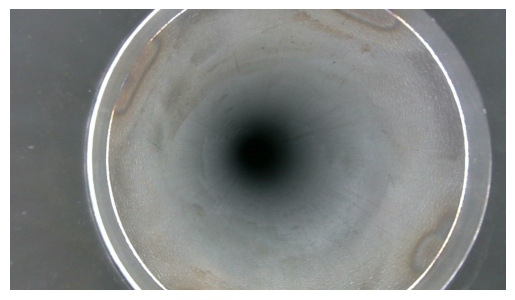

In [3]:
vis.color(color)

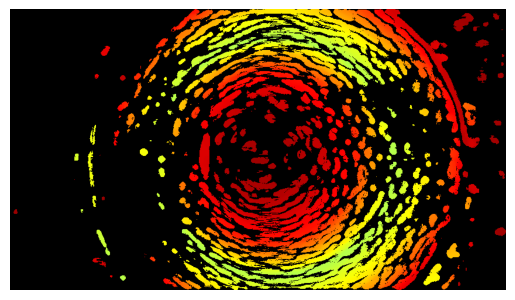

In [4]:
vis.depth_global(depth)

In [5]:
raw_pcd = create_pcd_from_rgbd(depth, color)
vis.pointcloud(raw_pcd)

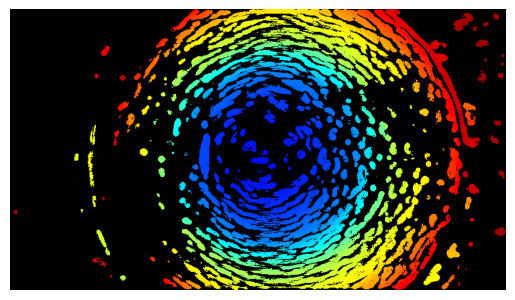

In [6]:
vis.depth_global(corrected_depth)

In [7]:
corrected_pcd = create_pcd_from_rgbd(corrected_depth, color)
vis.pointcloud(corrected_pcd)

In [8]:
clipped_corrected_pcd = create_pcd_from_rgbd(clipped_depth, color)
filtered_pcd = clip_radially(clipped_corrected_pcd)
vis.pointcloud(filtered_pcd)